In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # Import EarlyStopping
import keras_tuner as kt
import sqlite3
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

## Data Preparation and Preprocessing

In [18]:
# Connect to DB and import data into a pandas dataframe
connection = sqlite3.connect('../data/db.sqlite')
ratings = pd.read_sql_query("SELECT * FROM ratings", connection)
clean = pd.read_sql_query("SELECT * FROM clean", connection)
dummies = pd.read_sql_query("SELECT * FROM dummies", connection)
clean2 = pd.read_sql_query("SELECT * FROM clean2", connection)
dummies2 = pd.read_sql_query("SELECT * FROM dummies2", connection)

connection.close()



## Model Training and Evaluation (Model 1)

In [3]:
# Indicate Model Number 
model = 1

# Indicate which df to use
data_frame = dummies

# Split our preprocessed data into our features and target arrays
X = data_frame.drop(['Binary Rating'], axis=1)
y = data_frame['Binary Rating']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# Hidden layer
nn.add(tf.keras.layers.Dense(units=4,
             input_dim=number_input_features, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=2, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
EPOCHS = 75
mini_path = f'../models/model{model}/checkpoints/'
checkpoint_filepath = mini_path+'weights.epoch_{epoch:02d}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq=5,
    verbose=True)

# Fit the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 76        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75


2024-03-22 17:26:02.060818: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/183 [..............................] - ETA: 38s - loss: 0.6636 - accuracy: 0.5625
Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5
 27/183 [===>..........................] - ETA: 0s - loss: 0.7031 - accuracy: 0.6701 
Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model1/checkpoints/weigh

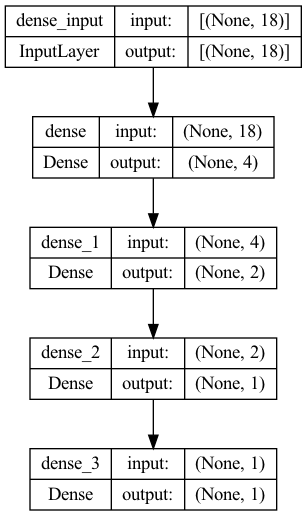

In [5]:
# Save a plot of the model
plot_model(nn, to_file=f'../img/models/deeplearning/model{model}_plot.png', show_shapes=True, show_layer_names=True)

61/61 - 0s - loss: 0.4247 - accuracy: 0.8233 - 57ms/epoch - 938us/step
Model 1-- Loss: 0.4247055947780609, Accuracy: 0.8232582211494446
61/61 [==============================] - 0s 311us/step
Confusion Matrix: [[ 650    0]
 [1302    0]]


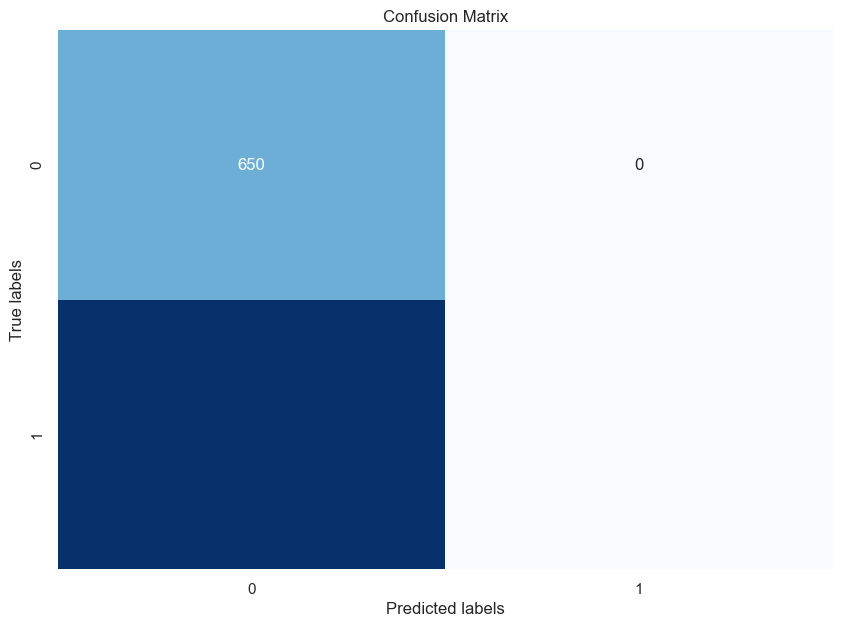

In [6]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model {model}-- Loss: {model_loss}, Accuracy: {model_accuracy}")
# Confusion Matrix
predictions = nn.predict(X_test_scaled)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix: ')
print(cm)

# Optional: Use seaborn for a nicer heatmap
sns.set()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

# Adding labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot as a PNG file
plt.savefig('../img/models/deeplearning/model{model}_confusion_matrix.png')

# Optionally, display the plot
plt.show()

In [7]:
# Export our model to HDF5 file
nn.save(f'../models/deeplearning/model{model}/model.h5')

## Model Training and Evaluation (Model 2)

In [8]:
# Indicate Model Number 
model = 2

# Indicate which df to use
data_frame = dummies

# Split our preprocessed data into our features and target arrays
X = data_frame.drop(['Binary Rating'], axis=1)
y = data_frame['Binary Rating']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# Hidden layer
nn.add(tf.keras.layers.Dense(units=4,
             input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
EPOCHS = 20
mini_path = f'../models/model{model}/checkpoints/'
checkpoint_filepath = mini_path+'weights.epoch_{epoch:02d}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq=5,
    verbose=True)

# Fit the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 76        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
  1/183 [..............................] - ETA: 31s - loss: 0.7679 - accuracy: 0.5000
Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5
 40/183 [=====>........................] - ETA: 0s - loss: 0.7235 - accuracy: 0.5961 
Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model2/checkp

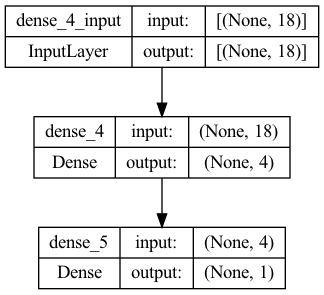

In [9]:
# Save a plot of the model
plot_model(nn, to_file=f'../img/models/deeplearning/model{model}_plot.png', show_shapes=True, show_layer_names=True)

61/61 - 0s - loss: 0.4781 - accuracy: 0.7961 - 79ms/epoch - 1ms/step
Model 2-- Loss: 0.4780711531639099, Accuracy: 0.7961065769195557
61/61 [==============================] - 0s 330us/step
Confusion Matrix: 
[[ 650    0]
 [1302    0]]


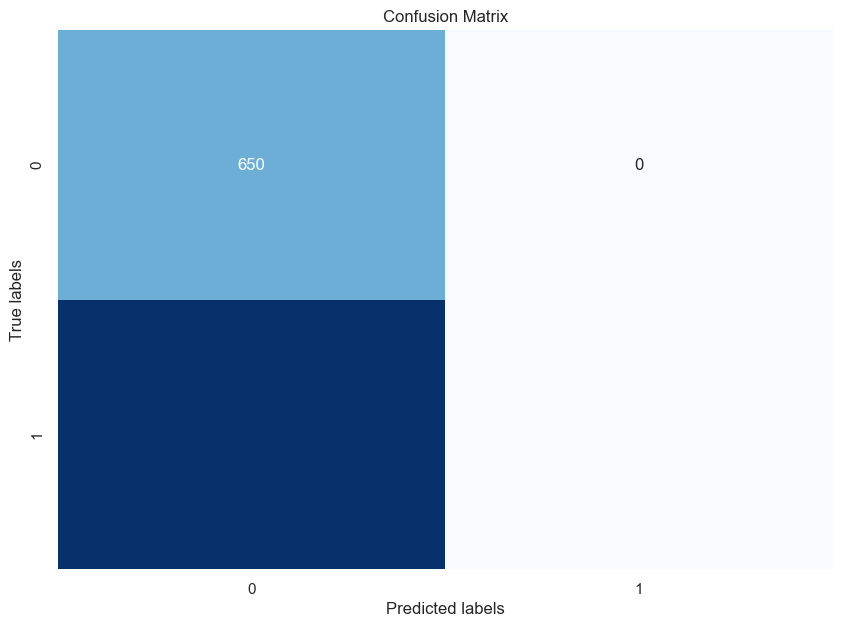

In [10]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model {model}-- Loss: {model_loss}, Accuracy: {model_accuracy}")
# Confusion Matrix
predictions = nn.predict(X_test_scaled)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix: ')
print(cm)

# Optional: Use seaborn for a nicer heatmap
sns.set()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

# Adding labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot as a PNG file
plt.savefig('../img/models/deeplearning/model{model}_confusion_matrix.png')

# Optionally, display the plot
plt.show()

In [11]:
# Export our model to HDF5 file
nn.save(f'../models/deeplearning/model{model}/model.h5')

## Model Training and Evaluation (Model 3)

In [12]:
# Indicate Model Number 
model = 3

# Indicate which df to use
data_frame = dummies

# Split our preprocessed data into our features and target arrays
X = data_frame.drop(['Binary Rating'], axis=1)
y = data_frame['Binary Rating']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# Hidden layer
nn.add(tf.keras.layers.Dense(units=3,
             input_dim=number_input_features, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=3, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
EPOCHS = 75
mini_path = f'../models/model{model}/checkpoints/'
checkpoint_filepath = mini_path+'weights.epoch_{epoch:02d}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq=5,
    verbose=True)

# Fit the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 57        
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


Epoch 1/75
  1/183 [..............................] - ETA: 42s - loss: 0.6838 - accuracy: 0.5625
Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5
 35/183 [====>.........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.6268 
Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving model to ../models/model3/checkp

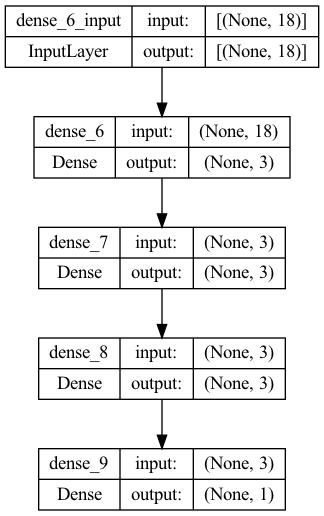

In [13]:
# Save a plot of the model
plot_model(nn, to_file=f'../img/models/deeplearning/model{model}_plot.png', show_shapes=True, show_layer_names=True)

61/61 - 0s - loss: 0.4496 - accuracy: 0.8043 - 86ms/epoch - 1ms/step
Model 3-- Loss: 0.4496111571788788, Accuracy: 0.8043032884597778
61/61 [==============================] - 0s 302us/step
Confusion Matrix: 
[[ 650    0]
 [1302    0]]


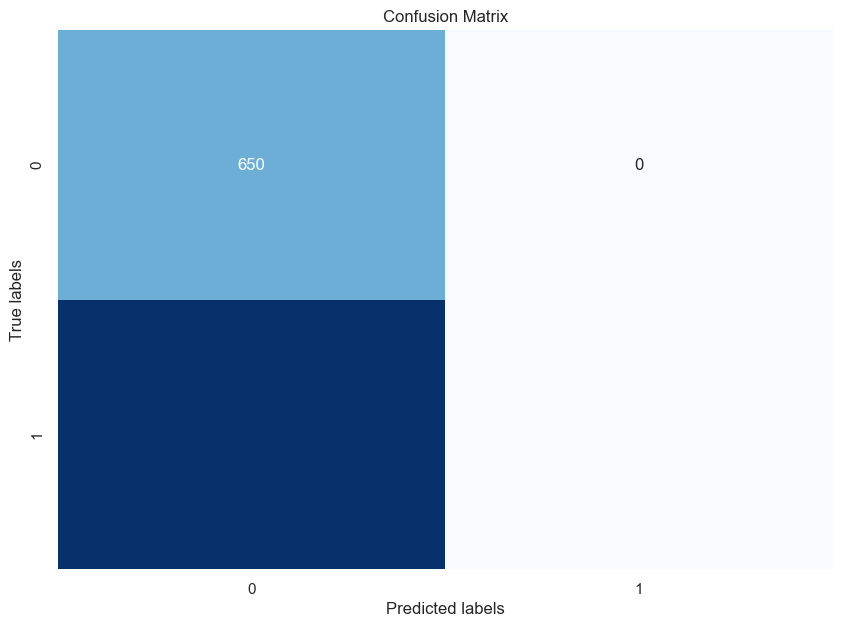

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model {model}-- Loss: {model_loss}, Accuracy: {model_accuracy}")
# Confusion Matrix
predictions = nn.predict(X_test_scaled)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix: ')
print(cm)

# Optional: Use seaborn for a nicer heatmap
sns.set()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

# Adding labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot as a PNG file
plt.savefig('../img/models/deeplearning/model{model}_confusion_matrix.png')

# Optionally, display the plot
plt.show()

In [15]:
# Export our model to HDF5 file
nn.save(f'../models/deeplearning/model{model}/model.h5')

## Model Training and Evaluation (Model 4)
Additional Columns Removed to Match API data

In [19]:
# Indicate Model Number 
model = 4

# Indicate which df to use
data_frame = dummies2

# Split our preprocessed data into our features and target arrays
X = data_frame.drop(['Binary Rating'], axis=1)
y = data_frame['Binary Rating']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# Hidden layer
nn.add(tf.keras.layers.Dense(units=4,
             input_dim=number_input_features, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=2, activation="relu"))

# Hidden layer
nn.add(tf.keras.layers.Dense(
    units=1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
EPOCHS = 75
mini_path = f'../models/model{model}/checkpoints/'
checkpoint_filepath = mini_path+'weights.epoch_{epoch:02d}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq=5,
    verbose=True)

# Fit the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 68        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75
  1/183 [..............................] - ETA: 43s - loss: 0.6931 - accuracy: 0.2500
Epoch 1: saving model to ../models/model4/checkpoints/weights.epoch_01.hdf5

Epoch 1: saving 

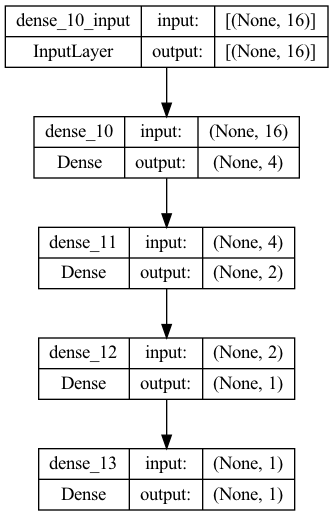

In [20]:
# Save a plot of the model
plot_model(nn, to_file=f'../img/models/deeplearning/model{model}_plot.png', show_shapes=True, show_layer_names=True)

61/61 - 0s - loss: 0.4578 - accuracy: 0.8089 - 86ms/epoch - 1ms/step
Model 4-- Loss: 0.45781341195106506, Accuracy: 0.8089139461517334
61/61 [==============================] - 0s 334us/step
Confusion Matrix: 
[[ 650    0]
 [1302    0]]


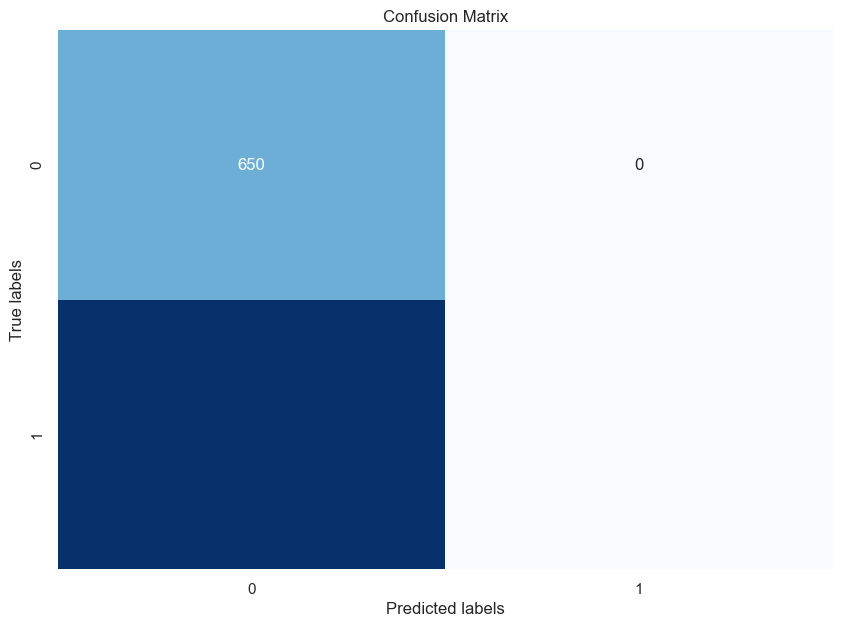

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model {model}-- Loss: {model_loss}, Accuracy: {model_accuracy}")
# Confusion Matrix
predictions = nn.predict(X_test_scaled)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix: ')
print(cm)

# Optional: Use seaborn for a nicer heatmap
sns.set()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

# Adding labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot as a PNG file
plt.savefig('../img/models/deeplearning/model{model}_confusion_matrix.png')

# Optionally, display the plot
plt.show()

In [22]:
# Export our model to HDF5 file
nn.save(f'../models/deeplearning/model{model}/model.h5')